# 径向基函数网络/RBF网络

## 简介

RBF网络时具有隐藏层的前向网络，隐藏层以RBF作为激活函数。不同于一般的BP网络，RBF网络具有局部逼近的特性。并且Poggio和Girosi已经证明RBF网络是连续函数的最佳逼近。

BP网络和RBF网络的区别见下图

![BP网络和RBF网络对比](https://raw.githubusercontent.com/koolo233/NeuralNetworks/main/images/bp_rbf.jpg "segment")

## 符号定义
|符号|含义|
|:-:|:-:|
|$\bm{x}$|输入向量|
|$\bm{c}$|中心坐标向量，每一个RBF函数均有自己的中心坐标向量|
|$\phi$|高斯核函数|
|$\varphi$|RBF函数|
|$\sigma$|标准化参数|
|$\bm{\hat{y}}$|模型输出|
|$\bm{y}$|真实输出|
|$\bm{W}$|隐藏层到输出层权重矩阵|
|$n$|输入维度|
|$k$|隐藏层神经元数量|
|$o$|输出维度|
|$\eta$|学习率|

## RBF网络的正向计算

### 定义RBF函数

$$
\begin{equation}
    \phi(\bm{x}, \bm{c}) = \phi(||\bm{x}-\bm{c}||)
\end{equation}
$$
上式中$c$为中心坐标，$\phi$为高斯核函数

* 以高斯核函数和欧氏距离定义的RBF函数
$$
\begin{equation}
    \varphi(\bm{x}) = exp(-\frac{1}{2}\sum_{i=1}^{n}\frac{(x_i-c_i)^2}{\sigma_i^2})
\end{equation}
$$

上式中，输入维度为$n$，$c_i$和$\sigma_i$分别为第$i$个维度的中心坐标和标准化参数


### 从输入层到隐藏层

假设隐藏层有k个神经元，则对于每一个神经元有
$$
\begin{equation}
    \varphi_i(\bm{x}) = exp(-\frac{1}{2}\sum_{j=1}^{n}\frac{(x_j-c_{ij})^2}{\sigma_{ij}^2}), \ i = 1, 2, 3, \cdots, k
\end{equation}
$$

若第i个神经元的标准化参数均相同，则可以得到
$$
\begin{equation}
    \begin{split}
    \varphi_i(\bm{x}) 
    &= exp(-\frac{1}{2\sigma_{i}^2}\sum_{j=1}^{n}(x_j-c_{ij})^2), \\
    &= exp(-\frac{1}{2\sigma_{i}^2}(\bm{x}-\bm{c_i})^T(\bm{x}-\bm{c_i})) \\
    &= exp(-\beta_i(\bm{x}-\bm{c_i})^T(\bm{x}-\bm{c_i}))
    \end{split}
    \ , i = 1, 2, 3, \cdots, k
\end{equation}
$$

$$
\begin{equation}
    \beta_i = \frac{1}{2\sigma_{i}^2}\ , i = 1, 2, 3, \cdots, k
\end{equation}
$$

### 从隐藏层到输出层
假设输出层有o个输出单元，则对于输出层有
$$
\begin{equation}
    \begin{split}
        \bm{y} 
        &= \bm{W}\bm{\varphi} \\
        &= 
        \left[
            \begin{array}{cc}
                \bm{w_1} \\
                \bm{w_2} \\
                \vdots \\
                \bm{w_o} \\
            \end{array}
        \right]
        \left[
            \begin{array}{cc}
                \varphi_1 \\
                \varphi_2 \\
                \vdots \\
                \varphi_k
            \end{array}
        \right]
    \end{split}
\end{equation}
$$

## RBF网络的学习算法

RBF网络待学习参数如下：
1. 高斯RBF函数的中心坐标$\bm{c}$和参数$\beta$
2. 隐藏层到输出层的权重$\bm{W}$

### 自组织选取中心学习算法
1. 无监督学习过程：求解高斯RBF函数相关参数
2. 有监督学习过程：求解隐藏层到输出层的权重

对于第一步，可以使用聚类相关方法来进行。即对于k个RBF单元，通过对输入样本聚类为k类来获得相应的中心坐标以及散度参数。


在完成第一步后，第二步为确定隐藏层到输出层的权重。这一步为线性映射，因此可以使用各种线性优化算法来求得最优解，例如最小二乘法等。

### 监督学习
对于RBF网络，其可以使用类似于一般BP算法中的梯度下降法对网络参数进行求解。在本文件中主要是实现这一优化方法。

## RBF网络的监督学习

* 定义损失
$$
\begin{equation}
    \mathcal{L(\bm{c}, \bm{\beta}, \bm{W})} = \frac{1}{M}\sum_{i=1}^M||\bm{\bar{y}}_i - \bm{y}_i||^2_2
\end{equation}
$$
其中$\bm{\hat{y}}_i$为第$i$个样本的输出，$\bm{y}_i$为第$i$个样本的标签，$M$为训练集的样本总数

* 定义优化函数
$$
\begin{equation}
    \min\limits_{\bm{c}, \bm{\beta}, \bm{W}}{\mathcal{L}(\bm{c}, \bm{\beta}, \bm{W})}=\frac{1}{M}\sum_{i=1}^M||\bm{\hat{y}}_i - \bm{y}_i||^2_2
\end{equation}
$$
* 误差反向传播(单样本)
    * $\bm{W}$
    $$
    \begin{equation}
        \begin{split}
            \frac{\partial \mathcal{L}}{\partial \bm{W}} 
            &= \frac{\partial \mathcal{L}}{\partial \bm{\hat{y}}} \frac{\partial \bm{\hat{y}}}{\partial \bm{W}} \\
            &= 2(\bm{\hat{y}}-\bm{y})\bm{\varphi}^T
        \end{split}
    \end{equation}
    $$
    * $\bm{\varphi}$
    $$
    \begin{equation}
        \begin{split}
            \frac{\partial \mathcal{L}}{\partial \bm{\varphi}}
            &= \frac{\partial \mathcal{L}}{\partial \bm{\hat{y}}} \frac{\partial \bm{\hat{y}}}{\partial \bm{\varphi}} \\ 
            &= 2(\bm{\hat{y}}-\bm{y})^T \bm{W}
        \end{split}
    \end{equation}
    $$
    * $\bm{c}$
    对于每一个隐藏单元的中心参数$\bm{c_i}$有
    $$
    \begin{equation}
        \begin{split}
            \frac{\partial \mathcal{L}}{\partial \bm{c_i}} 
            &= \frac{\partial \mathcal{L}}{\partial \varphi_i} \frac{\partial \varphi_i}{\partial \bm{c_i}} \\
            &= (\sum_{j=1}^o2(\hat{y}_j-y_j)\bm{W}_{ji})(\varphi_i)(2\beta_i(\bm{x}-\bm{c_i})^T) \\
            &= 4\varphi_i\beta_i(\bm{x}-{\bm{c_i}})^T\sum_{j=1}^o(\hat{y}_j-y_j)\bm{W}_{ji}
        \end{split}
    \end{equation}
    $$

    * $\bm{\beta}$
    对于每一个隐藏单元的参数$\beta_i$有
    $$
    \begin{equation}
        \begin{split}
            \frac{\partial \mathcal{L}}{\partial \bm{\beta_i}}
            &= \frac{\partial \mathcal{L}}{\partial \bm{\varphi_i}} \frac{\partial \bm{\varphi_i}}{\partial \bm{\beta_i}} \\
            &= (\sum_{j=1}^o2(\hat{y}_j-y_j)\bm{W}_{ji})(\varphi_i)((\bm{x}-\bm{c_i})^T(\bm{x}-\bm{c_i})) \\
            &= 2\varphi_i(\bm{x}-\bm{c_i})^T(\bm{x}-\bm{c_i})\sum_{j=1}^o(\hat{y}_j-y_j)\bm{W}_{ji}
        \end{split}
    \end{equation}
    $$

* 更新参数
    * $\bm{W}$
    $$
    \begin{equation}
        \bm{W}(t+1) = \bm{W}(t) - \eta\frac{\partial \mathcal{L}}{\partial \bm{W}(t)}
    \end{equation}
    $$
    * $\bm{c}$
    对于每一个隐藏单元的中心参数$\bm{c_i}$有
    $$
    \begin{equation}
        \bm{c_i}(t+1) = \bm{c_{i}}(t) - \eta (\frac{\partial \mathcal{L}}{\partial \bm{c_i}(t)})^T
    \end{equation}
    $$
    * $\bm{\beta}$
    对于每一个隐藏单元的参数$\bm{\beta_i}$有
    $$
    \begin{equation}
        \beta_i(t+1) = \beta_{i}(t) - \eta \frac{\partial \mathcal{L}}{\partial \beta_i(t)}
    \end{equation}
    $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
import imageio
import os
import random
from sklearn.datasets import make_blobs, make_moons

# seed
random.seed(1024)
np.random.seed(1024)
%matplotlib inline

In [9]:
class RadialBasisFunction(object):

    def __init__(self, input_dims, hidden_dims, output_dims):

        self.input_dims = input_dims
        self.hidden_dims = hidden_dims
        self.output_dims = output_dims

        # 模型权重
        random.seed(1024)
        np.random.seed(1024)
        
        # center parmas
        # hidden_dims, input_dims
        self.center_params = np.random.randn(hidden_dims, input_dims)
        # normalize params
        # hidden_dims,
        self.norm_params = np.random.random(hidden_dims)
        # output weights
        self.output_weights = np.random.randn(output_dims, hidden_dims+1)

        # 中间结果
        self.input_vector = None
        self.hidden_vector = None
        self.output_vector = None
        
        # 梯度结果
        self.grad_center_params = None
        self.grad_norm_params = None
        self.grad_hidden_output_vector = None
        self.grad_output_weights = None
    
    def forward(self, input_vector):
        
        """
        input_vector: 输入向量
        """
        assert np.shape(input_vector) == (self.input_dims, 1)
        self.input_vector = np.array(input_vector)

        # 输入到隐藏层输出
        self._input2hidden()

        # 隐藏层到输出层
        self._hidden2output()

        return self.output_vector
    
    def fit(self, X, Y, lr, iteration=10000, draw_fig=False, draw_type="contour sheet"):
        """
        训练函数
        X: 训练样本输入list
        Y: 训练样本标签list
        lr: 学习率
        iteration: 迭代次数
        draw_type: 绘图类型
        """

        random.seed(1024)
        np.random.seed(1024)

        # 总训练样本数
        samples_num = len(X)

        print_frequency = 1
        fig_count = 1

        plt.figure(figsize=(20, 10))
        for i in range(iteration):

            # 随机选择训练样本
            sample_index = np.random.randint(samples_num)

            # 输入向量
            train_input_vector = X[sample_index]
            # 输出向量
            train_output_vector = Y[sample_index]

            # 正向计算
            self.forward(train_input_vector)
            
            # 误差反向传播
            absolute_error = self.output_vector - train_output_vector
            # 隐藏层到输出层的权重矩阵梯度
            self.grad_output_weights = 2 * np.matmul(absolute_error, self.hidden_vector.T)
            # 隐藏层输出梯度
            self.grad_hidden_output_vector = 2 * np.matmul(absolute_error.T, self.output_weights).T
            
            # 对于每一个隐藏层神经元的梯度
            self.grad_center_params = np.zeros((self.hidden_dims, self.input_dims))
            self.grad_norm_params = np.zeros(self.hidden_dims)
            for j in range(self.hidden_dims):
                temp_vector = self.input_vector - self.center_params[j, :].reshape(-1, 1)

                self.grad_center_params[j, :] = 4 * self.hidden_vector[j] * self.norm_params[j] * temp_vector.reshape(-1) * self.grad_hidden_output_vector[j]
                self.grad_norm_params[j] = 2 * self.norm_params[j] * self.hidden_vector[j] * np.matmul(temp_vector.T, temp_vector) * self.grad_hidden_output_vector[j]
            
            # 参数更新
            self.output_weights -= lr * self.grad_output_weights
            self.center_params -= lr * self.grad_center_params

            # norm_mask = self.norm_params - lr * self.grad_norm_params
            self.norm_params -= lr * self.grad_norm_params

            if i % print_frequency == 0:
                self.val_func(X, Y, i, iteration, fig_count, draw_fig, draw_type, show_fig=False)
                fig_count += 1
                print_frequency = int(pow(1.1, fig_count))
            
        self.val_func(X, Y, iteration, iteration, fig_count, draw_fig, draw_type, show_fig=True)
    
    def val_func(self, X, Y, cur_iter, total_iter, fig_count, draw_fig=False, draw_type="contour sheet", show_fig=False):
        train_loss = 0
        pred_list = list()
        for s in range(len(X)):
            pred_y = self.forward(X[s])
            pred_list.append(pred_y)
            train_loss += np.sum((pred_y-Y[s])**2)
        train_loss /= len(X)
        print("iter[{}/{}], train_loss:{:.5f}".format(cur_iter, total_iter, train_loss))

        # draw
        if draw_fig:
            self.draw(X, Y, fig_count, cur_iter, pred_list=pred_list, draw_type=draw_type, if_show=show_fig)
    
    def draw(self, train_x_list, train_y_list, fig_count, cur_iter, pred_list=None, draw_type = "contour sheet", if_show=False, contour_resolution=100):
        """
        draw_type: 绘图类型；若为contour sheet则绘制等值线，否则根据输入数据绘制拟合曲线
        """
        if draw_type == "contour sheet":
            # 绘制等值线图
            x_list = np.linspace(np.min(train_x_list[:, 0]), np.max(train_x_list[:, 0]), contour_resolution)
            y_list = np.linspace(np.min(train_x_list[:, 1]), np.max(train_x_list[:, 1]), contour_resolution)

            show_x1, show_x2 = np.meshgrid(x_list, y_list)

            result_matrix = np.zeros((len(x_list), len(y_list)))
            for x_coor in range(len(x_list)):
                for y_coor in range(len(y_list)):
                    result_matrix[x_coor, y_coor] = self.forward([[x_list[x_coor]], [y_list[y_coor]]])

            plt.cla()
            plt.clf()
            plt.subplot(1, 2, 1)
            plt.title("train samples", fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            scatter = plt.scatter(train_x_list[:, 0], train_x_list[:, 1], c=train_y_list.reshape(-1))
            plt.legend(*scatter.legend_elements(), fontsize=15)
            plt.subplot(1, 2, 2)
            plt.title("contour sheet & iter:{}".format(cur_iter), fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            c = plt.contour(show_x1, show_x2, result_matrix, 8, colors="black")
            plt.contourf(show_x1, show_x2, result_matrix, 8)
            plt.clabel(c, inline=1, fontsize=20)

            plt.savefig("./images/temp/{}.png".format(fig_count), dpi=100)
            if if_show:
                plt.show()
        else:
            # 绘制回归图
            # 目前仅支持输入为1维，输出为1维的绘图
            plt.cla()
            plt.clf()
            assert np.shape(train_x)[1] == 1
            plt.title("regression & iter:{}".format(cur_iter), fontsize=20)

            # 绘制RBF函数
            for r in range(self.hidden_dims):
                show_x_list = list()
                show_y_list = list()
                center_point = self.center_params[r][0]
                normal_value = self.norm_params[r]
                input_list = np.linspace(np.min(train_x_list), np.max(train_x_list), 200)
                for _x in input_list:
                    temp_value = _x - center_point
                    temp_y = np.exp(-normal_value * temp_value**2) * self.output_weights[0, r]

                    show_x_list.append(_x)
                    show_y_list.append(temp_y)
            
                plt.plot(show_x_list, show_y_list, label="RBF output", c="#96ce54", linewidth=2)

            # 绘制数据和拟合曲线
            train_x_list = np.reshape(train_x_list, (-1))
            train_y_list = np.reshape(train_y_list, (-1))
            plt.plot(train_x_list.reshape(-1), train_y_list.reshape(-1), label="true value", c="#1685a9", linewidth=5)
            if pred_list is not None:
                pred_list = np.array(pred_list)
                plt.plot(train_x_list.reshape(-1), pred_list.reshape(-1), label="pred value", c="#fa8c35", linewidth=5)

            
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            handles, labels = plt.gca().get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
            plt.legend(by_label.values(), by_label.keys(), fontsize=15, loc=1)
            plt.savefig("./images/temp/{}.png".format(fig_count), dpi=100)
            if if_show:
                plt.show()


    def _input2hidden(self):
        """
        从输入向量到隐藏层输出
        """
        self.hidden_vector = np.ones((self.hidden_dims+1, 1))
        for i in range(self.hidden_dims):
            # 计算RBF输出
            temp_vector = self.input_vector - self.center_params[i, :].reshape(-1, 1)
            self.hidden_vector[i] = np.exp(-self.norm_params[i]*np.matmul(temp_vector.T, temp_vector))[0]

    def _hidden2output(self):
        """
        从隐藏层输出到输出层输出
        """
        self.output_vector = np.matmul(self.output_weights, self.hidden_vector)
    


In [3]:
# 数据
class DataCreator(object):

    def __init__(self) -> None:
        super().__init__()

    @staticmethod
    def get_and_data():
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = [-1, -1, -1, 1]
        return x_list, y_list

    @staticmethod
    def get_or_data():
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = [-1, 1, 1, 1]
        return x_list, y_list

    @staticmethod
    def get_nor_data(nor_index):
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = list()
        for i in range(len(x_list)):
            if x_list[i][nor_index]:
                y_list.append(-1)
            else:
                y_list.append(1)
        
        return x_list, y_list

    @staticmethod
    def get_xor_data():
        x_list = [[0, 0], [0, 1], [1, 0], [1, 1]]
        y_list = [-1, 1, 1, -1]
        return x_list, y_list

    @staticmethod
    def get_moon_data(sample_num, noise=0.05):
        x_list, y_list = make_moons(sample_num, noise=noise, random_state=1024)
        y_list = y_list * 2 - 1
        return x_list, y_list

    @staticmethod
    def get_blob_data(sample_num, std=0.3):
        x_list, y_list = make_blobs(n_samples=sample_num, centers=2, 
                                    cluster_std=std, random_state=1024, center_box=(-2, 2))
        y_list = y_list * 2 - 1
        return x_list, y_list

In [4]:
# 测试

# 输入一维
# 隐藏层3个RBF函数
# 输出二维

input_dims = 1
hidden_dims = 3
output_dims = 2

model = RadialBasisFunction(input_dims, hidden_dims, output_dims)

# 测试输入
test_input = [[1]]
# 测试真实输出
test_output = [[1], [2]]

print(model.forward(test_input))

# 模型训练
model.fit([test_input], [test_output], lr=0.01, iteration=200)

print(model.forward(test_input))

[[2.71612115]
 [2.49176832]]
iter[0/200], train_loss:2.74691
iter[1/200], train_loss:2.36720
iter[2/200], train_loss:2.03946
iter[3/200], train_loss:1.75661
iter[4/200], train_loss:1.51254
iter[5/200], train_loss:1.30199
iter[6/200], train_loss:1.12043
iter[8/200], train_loss:0.82904
iter[10/200], train_loss:0.61283
iter[12/200], train_loss:0.45261
iter[14/200], train_loss:0.33404
iter[15/200], train_loss:0.28690
iter[18/200], train_loss:0.18162
iter[21/200], train_loss:0.11486
iter[24/200], train_loss:0.07258
iter[28/200], train_loss:0.03933
iter[30/200], train_loss:0.02894
iter[35/200], train_loss:0.01343
iter[36/200], train_loss:0.01152
iter[42/200], train_loss:0.00458
iter[49/200], train_loss:0.00156
iter[56/200], train_loss:0.00053
iter[64/200], train_loss:0.00016
iter[72/200], train_loss:0.00005
iter[80/200], train_loss:0.00001
iter[88/200], train_loss:0.00000
iter[91/200], train_loss:0.00000
iter[98/200], train_loss:0.00000
iter[105/200], train_loss:0.00000
iter[119/200], train_

<Figure size 1440x720 with 0 Axes>

### 线性可分样本簇

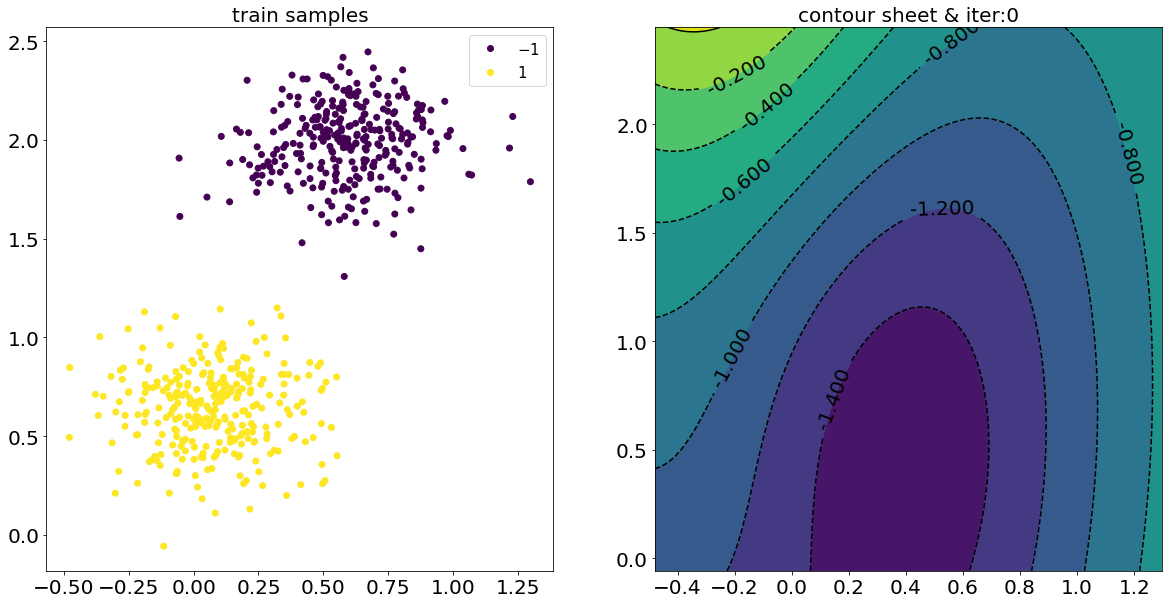

iter[0/20000], train_loss:2.55125
iter[1/20000], train_loss:2.53504
iter[2/20000], train_loss:2.51850
iter[3/20000], train_loss:2.50322
iter[4/20000], train_loss:2.50303
iter[5/20000], train_loss:2.50302
iter[6/20000], train_loss:2.50301
iter[8/20000], train_loss:2.47212
iter[10/20000], train_loss:2.47206
iter[12/20000], train_loss:2.45650
iter[14/20000], train_loss:2.45635
iter[15/20000], train_loss:2.44108
iter[18/20000], train_loss:2.40540
iter[21/20000], train_loss:2.39013
iter[24/20000], train_loss:2.37594
iter[28/20000], train_loss:2.33631
iter[30/20000], train_loss:2.31175
iter[35/20000], train_loss:2.26205
iter[36/20000], train_loss:2.25082
iter[42/20000], train_loss:2.25119
iter[49/20000], train_loss:2.22112
iter[56/20000], train_loss:2.19833
iter[64/20000], train_loss:2.18394
iter[72/20000], train_loss:2.12787
iter[80/20000], train_loss:2.08137
iter[88/20000], train_loss:2.04943
iter[91/20000], train_loss:2.05415
iter[98/20000], train_loss:2.01702
iter[105/20000], train_loss:

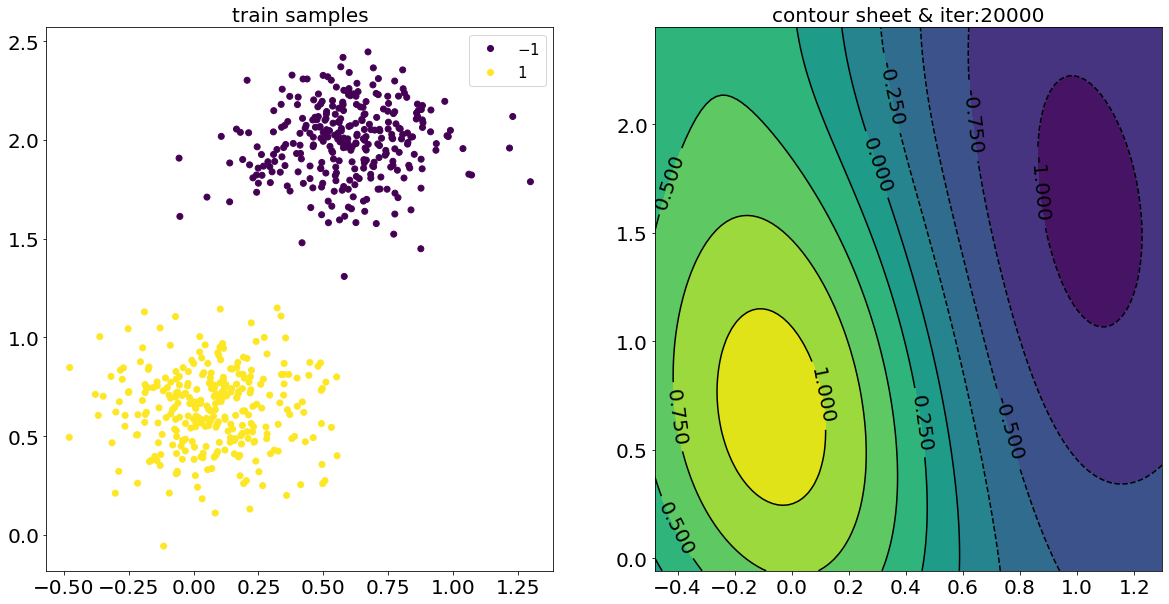

In [5]:
# 数据生成器
data_creator = DataCreator()
# 获取训练数据
train_x_all, train_y_all = data_creator.get_blob_data(600, std=0.2)
train_x_range = [np.min(train_x_all), np.max(train_x_all)]
# 定义模型
# 输入维度：2
# 输出维度：1
# 隐藏层维度：20
input_dims = 2
hidden_dims = 10
output_dims = 1

model = RadialBasisFunction(input_dims, hidden_dims, output_dims)

plt.figure(figsize=(20, 10))
model.draw(train_x_all, train_y_all, 0, 0, if_show=True)

# 模型训练
pred_recorder = model.fit(np.expand_dims(train_x_all, axis=2), np.expand_dims(train_y_all, axis=(1, 2)), lr=0.0005, iteration=20000, draw_fig=True)

# 保存gif
with imageio.get_writer("./images/{}.gif".format("RBF_regression"), mode="I", fps=5) as Writer:
    fig_num = len(os.listdir("./images/temp"))
    for ind in range(fig_num):
        image = imageio.imread("./images/temp/{}.png".format(ind))
        if ind != fig_num-1:
            os.remove("./images/temp/{}.png".format(ind))
        Writer.append_data(image)
    for i in range(10):
        Writer.append_data(image)
    os.remove("./images/temp/{}.png".format(fig_num-1))

#### 训练过程

![分类](https://raw.githubusercontent.com/koolo233/NeuralNetworks/main/images/RBF_classification.gif "segment")

### 回归

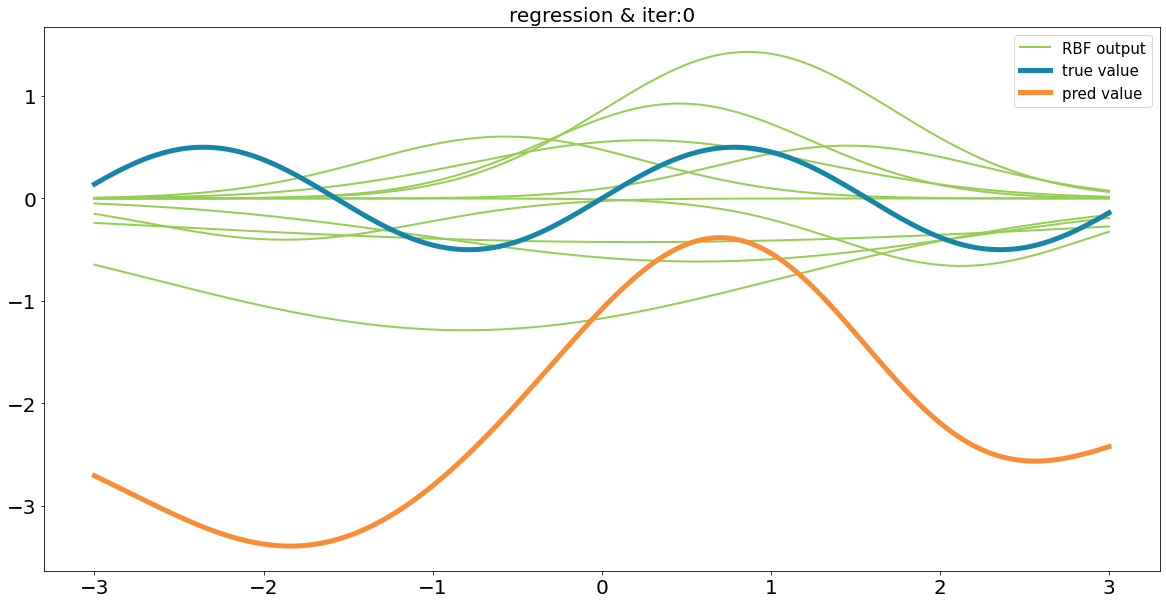

iter[0/60000], train_loss:5.39706
iter[1/60000], train_loss:5.39877
iter[2/60000], train_loss:5.39023
iter[3/60000], train_loss:5.37685
iter[4/60000], train_loss:5.36858
iter[5/60000], train_loss:5.36010
iter[6/60000], train_loss:5.36067
iter[8/60000], train_loss:5.30500
iter[10/60000], train_loss:5.26766
iter[12/60000], train_loss:5.27023
iter[14/60000], train_loss:5.24652
iter[15/60000], train_loss:5.22184
iter[18/60000], train_loss:5.20095
iter[21/60000], train_loss:5.19376
iter[24/60000], train_loss:5.16877
iter[28/60000], train_loss:5.14059
iter[30/60000], train_loss:5.10509
iter[35/60000], train_loss:5.06403
iter[36/60000], train_loss:5.03877
iter[42/60000], train_loss:5.00729
iter[49/60000], train_loss:4.96361
iter[56/60000], train_loss:4.90537
iter[64/60000], train_loss:4.78979
iter[72/60000], train_loss:4.68661
iter[80/60000], train_loss:4.58976
iter[88/60000], train_loss:4.51341
iter[91/60000], train_loss:4.47847
iter[98/60000], train_loss:4.43033
iter[105/60000], train_loss:

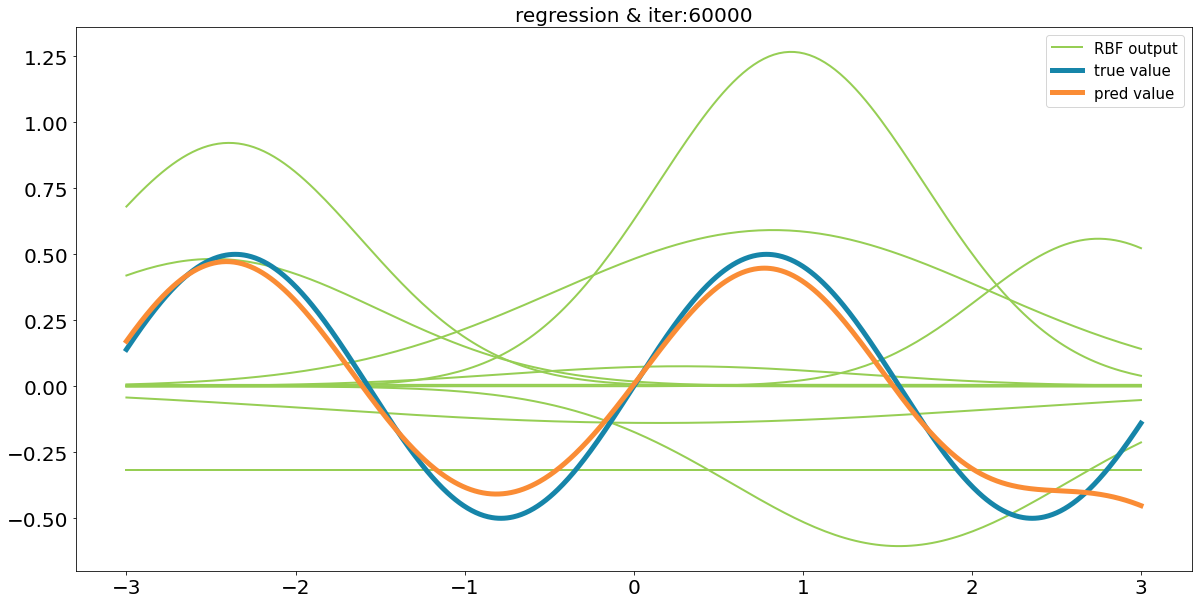

In [10]:
# 对sin(x)cos(x)进行回归

# 定义数据
train_x = np.linspace(-3, 3, 1000).reshape(-1, 1, 1)
train_y = np.sin(train_x) * np.cos(train_x)

# 定义模型
input_dims = 1
hidden_dims = 10
output_dims = 1

model = RadialBasisFunction(input_dims, hidden_dims, output_dims)

pred_list = list()
for s in range(len(train_x)):
    pred_y = model.forward(train_x[s])
    pred_list.append(pred_y)

plt.figure(figsize=(20, 10))
model.draw(train_x, train_y, 0, 0, pred_list=pred_list, draw_type="regression", if_show=True)

# 模型训练
pred_recorder = model.fit(train_x, train_y, lr=0.0005, iteration=60000, draw_fig=True, draw_type="regression")

# 保存gif
with imageio.get_writer("./images/{}.gif".format("RBF_regression"), mode="I", fps=5) as Writer:
    fig_num = len(os.listdir("./images/temp"))
    for ind in range(fig_num):
        image = imageio.imread("./images/temp/{}.png".format(ind))
        if ind != fig_num-1:
            os.remove("./images/temp/{}.png".format(ind))
        Writer.append_data(image)
    for i in range(10):Writer.append_data(image)
    os.remove("./images/temp/{}.png".format(fig_num-1))

#### 训练过程

![回归](https://raw.githubusercontent.com/koolo233/NeuralNetworks/main/images/RBF_regression.gif "segment")